# 3 Advanced Merging and Concatenating

In this chapter, you’ll leverage powerful filtering techniques, including semi-joins and anti-joins. You’ll also learn how to glue DataFrames by vertically combining and using the pandas.concat function to create new datasets. Finally, because data is rarely clean, you’ll also learn how to validate your newly combined data structures.

# Performing an anti join

In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The top_cust and employees tables have been provided for you.

# Instructions:

- Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.

In [3]:
import pandas as pd
employees = pd.read_csv('employees.csv')
top_cust = pd.read_csv('top_cust.csv')

# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on = 'srid', how = 'left', indicator = True)

- Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.

In [4]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on = 'srid', 
                            how = 'left', indicator = True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

- Subset the employees table and select those rows where the srid is in the variable srid_list and print the results.

In [5]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on = 'srid', 
                                 how = 'left', indicator = True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   srid     lname    fname            title  hire_date  \
0     1     Adams   Andrew  General Manager 2002-08-14   
1     2   Edwards       cy    Sales Manager 2002-05-01   
5     6  Mitchell  Michael       IT Manager 2003-10-17   
6     7      King   Robert         IT Staff 2004-01-02   
7     8  Callahan    Laura         IT Staff 2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1       cy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


# Performing a semi join

Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks..

The tables non_mus_tcks, top_invoices, and genres have been loaded for you.

# Instructions:

- Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices.
- Use .isin() to subset the rows of non_mus_tck where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
- Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
- Merge cnt_by_gid with the genres table on gid and print the result.

In [7]:
non_mus_tcks = pd.read_csv('non_mus_tcks.csv')
top_invoices = pd.read_csv('top_invoices.csv')
genres = pd.read_csv('genres.csv')

# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on = 'tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index = False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on = 'gid'))

   gid  tid
0   19    4
1   21    2
2   22    1


# Concatenation basics

You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.

The tables tracks_master, tracks_ride, and tracks_st have loaded for you.

# Instructions:

- Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.

In [9]:
tracks_master = pd.read_csv('tracks_master.csv')
tracks_ride = pd.read_csv('tracks_ride.csv')
tracks_st = pd.read_csv('tracks_st.csv')

# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], sort = True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.90
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


- Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.

In [10]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], ignore_index = True, sort = True)
print(tracks_from_albums)


    aid  gid  mtid                     name   tid  u_price
0   155    3     1                  Frantic  1882     0.99
1   155    3     1                St. Anger  1883     0.99
2   155    3     1     Some Kind Of Monster  1884     0.99
3   155    3     1             Dirty Window  1885     0.99
4   155    3     1            Invisible Kid  1886     0.90
5   154    3     1     Fight Fire With Fire  1874     0.99
6   154    3     1       Ride The Lightning  1875     0.99
7   154    3     1  For Whom The Bell Tolls  1876     0.99
8   154    3     1            Fade To Black  1877     0.99
9   154    3     1        Trapped Under Ice  1878     0.99
10  155    3     1                  Frantic  1882     0.99
11  155    3     1                St. Anger  1883     0.99
12  155    3     1     Some Kind Of Monster  1884     0.99
13  155    3     1             Dirty Window  1885     0.99
14  155    3     1            Invisible Kid  1886     0.99


- Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.

In [11]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st], join = 'inner', sort = True)

print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.90
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


# Concatenating with keys

The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.

# Instructions:

- Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to variable avg_inv_by_month.
- Use the .agg() method to find the average of the total column from the grouped invoices.
- Create a bar chart of avg_inv_by_month.

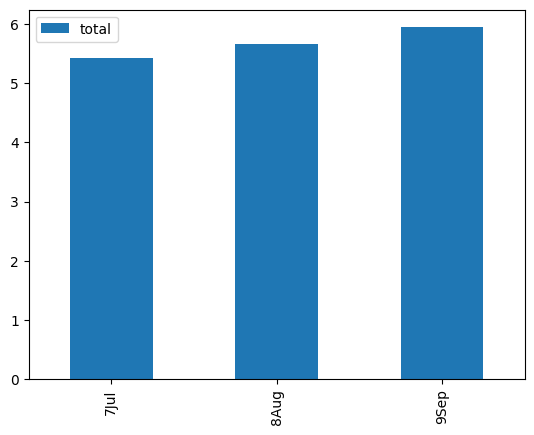

In [14]:
import matplotlib.pyplot as plt

inv_jul = pd.read_csv('inv_jul.csv')
inv_aug = pd.read_csv('inv_aug.csv')
inv_sep = pd.read_csv('inv_sep.csv')

# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level = 0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind = 'bar')
plt.show()

# Validating a merge

You have been given 2 tables, artists, and albums. Use the IPython shell to merge them using artists.merge(albums, on='artid').head(). Adjust the validate argument to answer which statement is False.

# Instructions:

Possible answers

( ) You can use 'many_to_many' without an error, since there is a duplicate key in one of the tables.

( ) You can use 'one_to_many' without error, since there is a duplicate key in the right table.

(x) You can use 'many_to_one' without an error, since there is a duplicate key in the left table.

# Concatenate and merge to find common songs

The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables classic_18, classic_19, and pop_18, pop_19 have been loaded for you. Additionally, pandas has been loaded as pd.

# Instructions:

- Concatenate the classic_18 and classic_19 tables vertically where the index goes from 0 to n-1, and save to classic_18_19.
- Concatenate the pop_18 and pop_19 tables vertically where the index goes from 0 to n-1, and save to pop_18_19.

In [16]:
classic_18 = pd.read_csv('classic_18.csv')
classic_19 = pd.read_csv('classic_19.csv')
pop_18 = pd.read_csv('pop_18.csv')
pop_19 = pd.read_csv('pop_19.csv')

# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index = True)


# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index = True)